# RakamTanima CNN

---
[<img align="right" width="100" height="100" src="http://www.i2symbol.com/images/symbols/style-letters/circled_latin_capital_letter_a_u24B6_icon_128x128.png">](https://www.ayyucekizrak.com/)

**Colab** için kimlik doğrulama adımları:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Kurulum ve Kontroller

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17406991080642980702, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 183500800
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4854968716796667022
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

**Drive da dosya konumlandırmayı yapma işlemleri**

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

/bin/bash: google-drive-ocamlfuse: command not found
drive  sample_data


In [ ]:
!ls drive

'My Drive'


In [ ]:
import os 
os.chdir("/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/")
!pwd

/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari


In [ ]:
!ls

ArtistikStilTransferi		  fashion_mnist.py
Duygu_Tanima			  Nesne_Tanima
EvrisimliSinirAgi_AdimAdim.ipynb  RakamTanima_CNN.ipynb
evrisimlisiniragi_adimadim.py	  rakamtanima_cnn.py
Fashion_MNIST.ipynb		  YOLO_ile_Nesne_Yeri_Tespiti


In [ ]:
!pip install -q keras

### Uygulama Başlangıç

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Veriden örnekleri görselleştirme

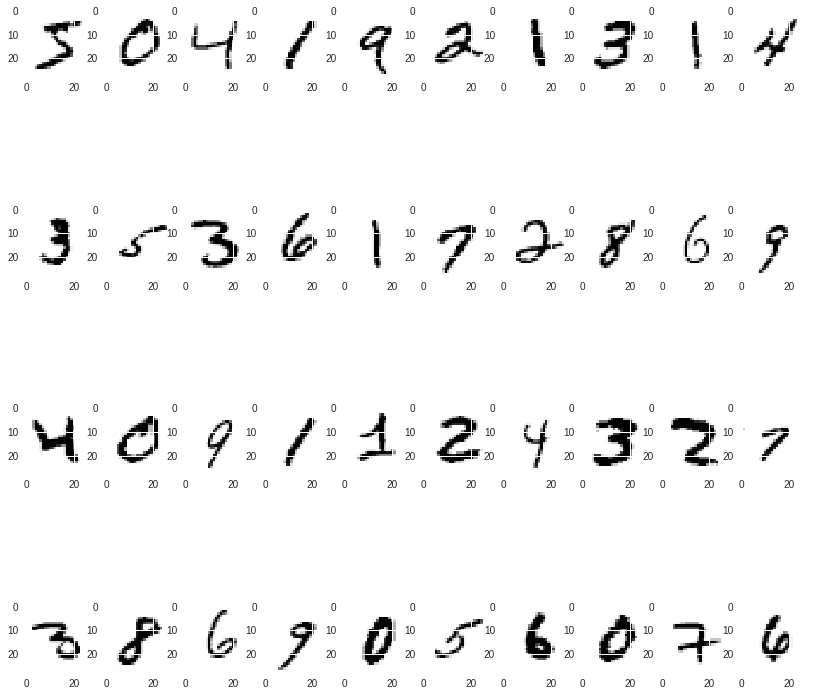

In [ ]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [ ]:
batch_size = 128 
num_classes = 10 
epochs = 6 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## MODEL OLUŞTURMA

In [ ]:
model = Sequential() 

**Katlanların oluşturulması**

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

Modell Görselleştirme


In [ ]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [ ]:

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### Eğitim İşlemleri

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 12s 195us/step - loss: 2.4778 - acc: 0.7914 - val_loss: 0.0729 - val_acc: 0.9784
Epoch 2/6
60000/60000 [==============================] - 10s 164us/step - loss: 0.1152 - acc: 0.9668 - val_loss: 0.0437 - val_acc: 0.9854
Epoch 3/6
60000/60000 [==============================] - 10s 164us/step - loss: 0.0824 - acc: 0.9769 - val_loss: 0.0374 - val_acc: 0.9870
Epoch 4/6
60000/60000 [==============================] - 10s 163us/step - loss: 0.0652 - acc: 0.9808 - val_loss: 0.0333 - val_acc: 0.9896
Epoch 5/6
60000/60000 [==============================] - 10s 168us/step - loss: 0.0543 - acc: 0.9839 - val_loss: 0.0323 - val_acc: 0.9900
Epoch 6/6
60000/60000 [==============================] - 10s 163us/step - loss: 0.0488 - acc: 0.9852 - val_loss: 0.0330 - val_acc: 0.9896


In [ ]:
model.save('save_models/mnist_model.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 0.03304198571913785
Test Accuracy: 0.9896


**Rastgele değer için test işlemi**

In [ ]:
model_test = model.save('save_models/mnist_model.h5')

In [ ]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

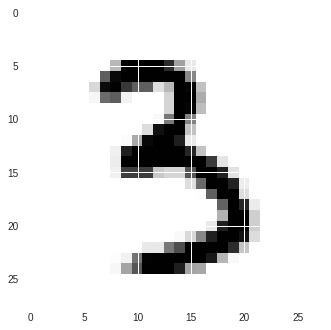

In [ ]:
plt.imshow(test_image.reshape(28,28))

In [ ]:
test_data = x_test[32].reshape(1,28,28,1)
pre=model_test.predict(test_data, batch_size=1)